In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)


60000

In [45]:
#X_train_flattened = X_train.reshape(len(X_train), 28*28)
#X_test_flattened = X_test.reshape(len(X_test), 28*28)

model = keras.models.Sequential()
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))


In [47]:

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9850
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0318 - accuracy: 0.9894
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0268 - accuracy: 0.9907
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9926


313/313 [==============================] - 0s 1ms/step - loss: 74.4423 - accuracy: 0.9663
74.44233703613281 0.9663000106811523
INFO:tensorflow:Assets written to: fr_model/assets
7


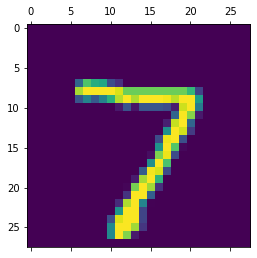

In [55]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print (test_loss, test_acc)

model.save("fr_model")
fr_model = keras.models.load_model("fr_model")
predictions = fr_model.predict(X_test)
print(np.argmax(predictions[0]))
plt.matshow(X_test[0])